In [674]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

from yellowbrick.classifier import ClassificationReport, ROCAUC

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [675]:
os.chdir("E:\AI-ML\Ensemble Techniques & Model Tuning")
df = pd.read_csv("bank-full.csv")

In [676]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Univariate analysis

In [677]:
df.shape

(45211, 17)

In [678]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [679]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [680]:
for i in list(df.columns):
    print('Number of unique values in', i, 'is',df[i].nunique())

Number of unique values in age is 77
Number of unique values in job is 12
Number of unique values in marital is 3
Number of unique values in education is 4
Number of unique values in default is 2
Number of unique values in balance is 7168
Number of unique values in housing is 2
Number of unique values in loan is 2
Number of unique values in contact is 3
Number of unique values in day is 31
Number of unique values in month is 12
Number of unique values in duration is 1573
Number of unique values in campaign is 48
Number of unique values in pdays is 559
Number of unique values in previous is 41
Number of unique values in poutcome is 4
Number of unique values in Target is 2


In [681]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,"45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00","45,211.00"
mean,40.94,"1,362.27",15.81,258.16,2.76,40.20,0.58
std,10.62,"3,044.77",8.32,257.53,3.10,100.13,2.30
min,18.00,"-8,019.00",1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,"1,428.00",21.00,319.00,3.00,-1.00,0.00
max,95.00,"102,127.00",31.00,"4,918.00",63.00,871.00,275.00


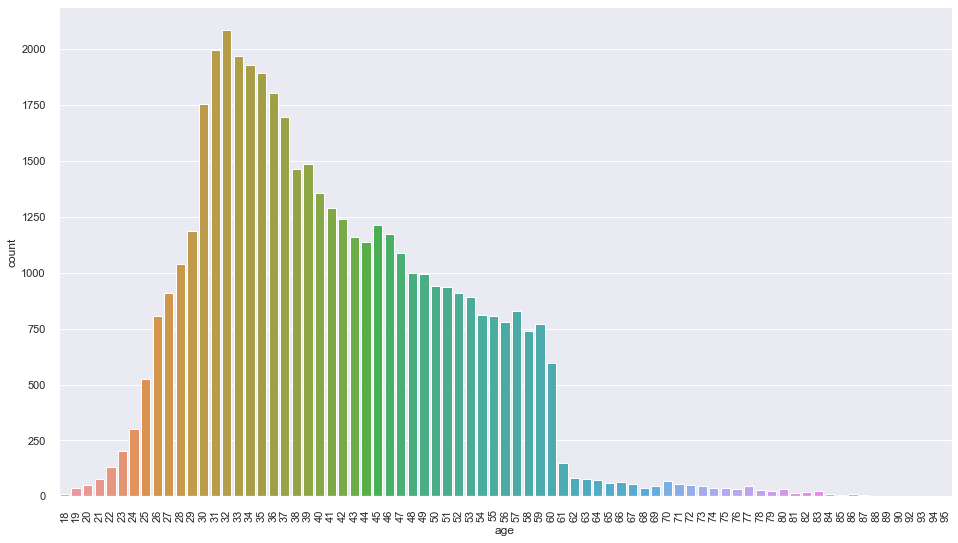

In [682]:
sns.set(color_codes = True)
plt.figure(figsize = (16,9));
chart = sns.countplot(df['age']);
chart.set_xticklabels(chart.get_xticklabels(), rotation =  90);

Age column is highly skewed, it has maximum values in age of 31 to 37 and then count gets decreasing but age diversity goes even around 87 years of age too

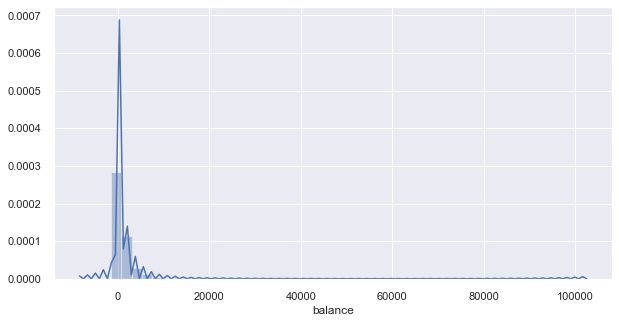

In [683]:
plt.figure(figsize=(10,5));
sns.distplot(df['balance']);

Balance feature is highly positive skewed with few negative values as well

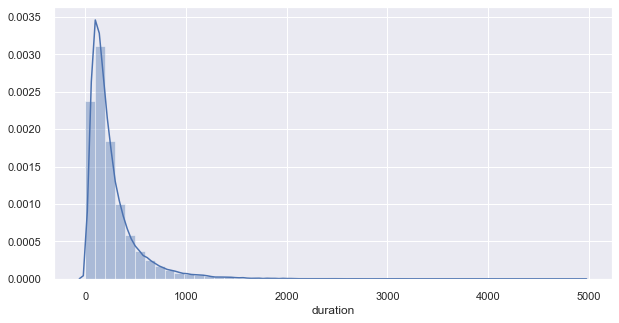

In [684]:
plt.figure(figsize=(10,5));
sns.distplot(df['duration']);

Duration feature is also positively skewed with most of the values for less than 700 seconds

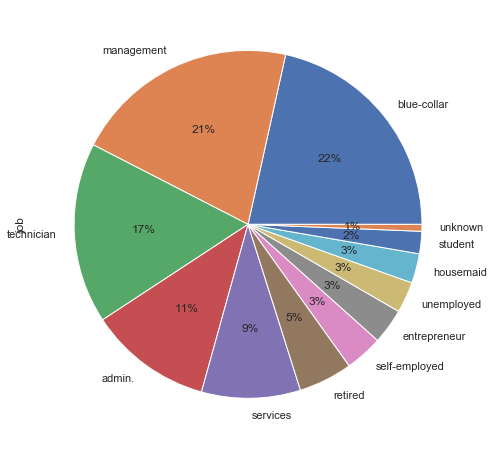

In [685]:
plt.figure(figsize=(8,8));
df['job'].value_counts().plot(kind='pie',autopct='%1.0f%%');

Top 5% Job Categories are Blue-collar, management, technician, admin & services and these top 5% are comprising 80% of our data.

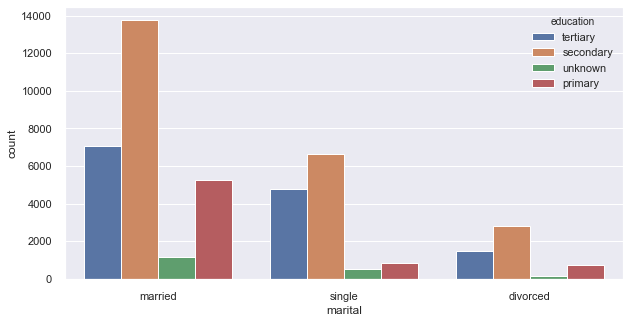

In [686]:
plt.figure(figsize = (10,5));
sns.countplot(df['marital'], hue=df['education']);

Married people have more secondary & tertiary education level than single and divorced

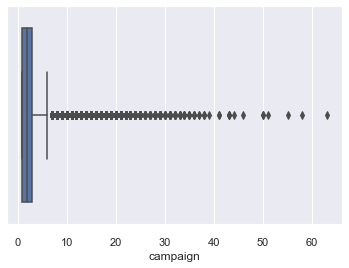

In [687]:
sns.boxplot(df['campaign']);

campaign feature has so many outliers and is highly positive skewed with mean value around 2.76 and a maximum value of 63

In [688]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

We have no traditional missing values in any column, however lets analyze unique values of each attribute if any value is senseless or misleading

In [689]:
df[df['age'] < 0]
df['age'].max()

95

Age has no negative value and maximum value is not senseless too

In [690]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [691]:
df['job']= df['job'].replace({'admin.':'admin','unknown':'other'})
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar', 'other',
       'retired', 'admin', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

job feature had "admin." and is replaced with "admin" ; "unknown" values are replaced with "other" values which would make more sense in analysis

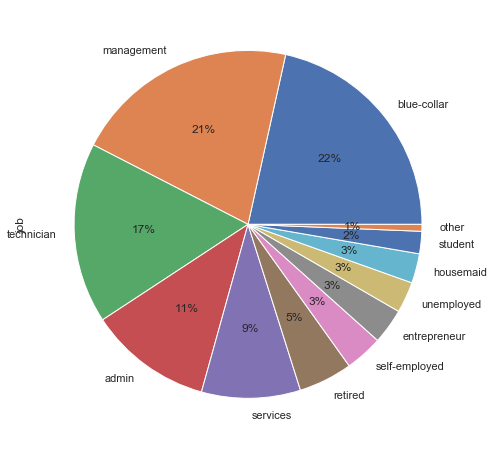

In [692]:
plt.figure(figsize=(8,8));
df['job'].value_counts().plot(kind = 'pie', autopct='%1.0f%%');

We can see that 'admin.' is replaced with 'admin' & 'unknown' replaced with 'other' values.

In [693]:
df['marital'].unique()
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Column 'marital' has justified values, so there is no need to make changes

In [694]:
df['education'].unique()
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

We can see that 'unknown' values have significant counts, so it's better to keep 'unknown' values un-changed.

Customers who went to default state are 1.803 %


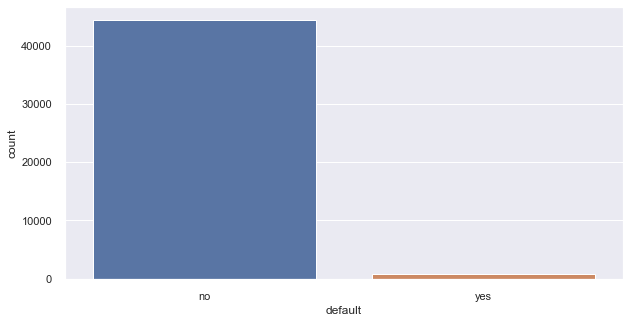

In [695]:
plt.figure(figsize=(10,5));
sns.countplot(df['default']);
print ("Customers who went to default state are", round(df['default'].value_counts()[1]/df['default'].value_counts().sum()*100,3),"%")

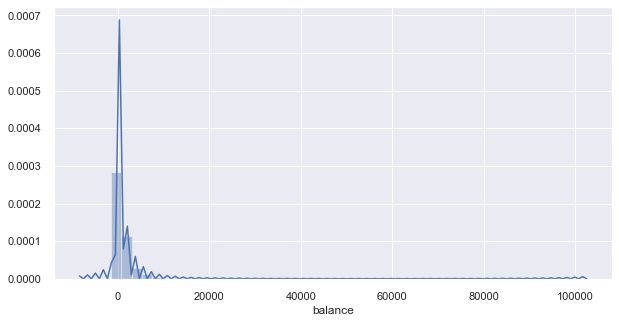

In [696]:
plt.figure(figsize=(10,5));
sns.distplot(df['balance']);

In [697]:
#Scales the data. Essentially returns the z-scores of every attribute

from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

std_scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [698]:
df['balance_transformed'] = std_scale.fit_transform(df[['balance']]) # returns z-scores of the values of the attribute

In [699]:
df['balance_transformed'].min(),df['balance_transformed'].max()

(-3.0811485466035458, 33.09477575528038)

In [700]:
df['balance_transformed'].describe()

count   45,211.00
mean         0.00
std          1.00
min         -3.08
25%         -0.42
50%         -0.30
75%          0.02
max         33.09
Name: balance_transformed, dtype: float64

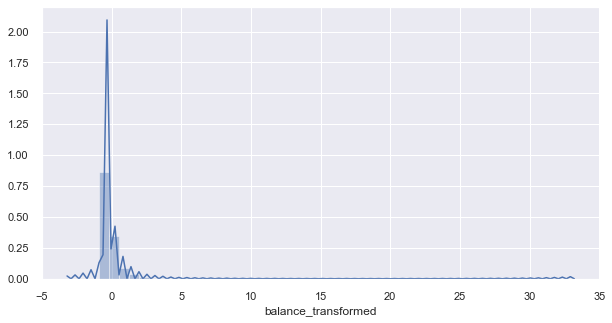

In [701]:
plt.figure(figsize=(10,5));
sns.distplot(df['balance_transformed']);

In [702]:
from sklearn.preprocessing import MinMaxScaler  # Min-Max Scaler

minmax_scale = MinMaxScaler()

minmax_scale

MinMaxScaler(copy=True, feature_range=(0, 1))

In [703]:
df['balance_transformed_minmax'] = minmax_scale.fit_transform(df[['balance']])

In [704]:
df['balance_transformed_minmax'].value_counts().sum()

45211

In [705]:
df['balance_transformed_minmax'].min(),df['balance_transformed_minmax'].max()

(0.0, 1.0)

In [706]:
df['balance_transformed_minmax'].describe()

count   45,211.00
mean         0.09
std          0.03
min          0.00
25%          0.07
50%          0.08
75%          0.09
max          1.00
Name: balance_transformed_minmax, dtype: float64

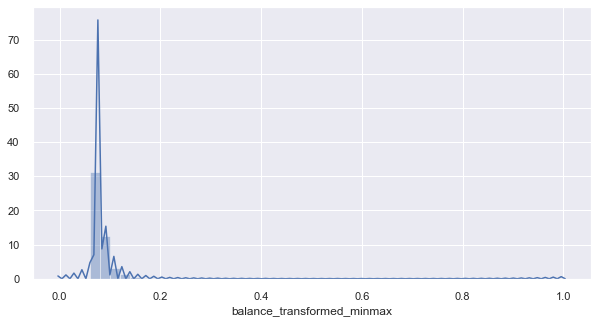

In [707]:
plt.figure(figsize=(10,5));
sns.distplot(df['balance_transformed_minmax']);

In [708]:
df['balance_transformed_minmax'].value_counts()

0.07    3514
0.07     195
0.07     156
0.07     139
0.07     134
0.07     113
0.07      88
0.07      81
0.07      75
0.07      69
0.07      69
0.07      65
0.07      63
0.07      62
0.07      60
0.07      59
0.07      59
0.07      59
0.07      59
0.07      58
0.07      57
0.07      56
0.07      56
0.07      55
0.07      55
0.07      54
0.07      54
0.07      54
0.07      54
0.07      53
        ... 
0.18       1
0.12       1
0.12       1
0.10       1
0.13       1
0.09       1
0.06       1
0.12       1
0.07       1
0.14       1
0.22       1
0.14       1
0.30       1
0.14       1
0.12       1
0.45       1
0.08       1
0.12       1
0.09       1
0.07       1
0.12       1
0.11       1
0.16       1
0.16       1
0.06       1
0.26       1
0.11       1
0.07       1
0.13       1
0.00       1
Name: balance_transformed_minmax, Length: 7168, dtype: int64

### After checking z-transform and minmax-transform, it seems like min-max transform is better as it contains less variation in values

In [709]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target', 'balance_transformed',
       'balance_transformed_minmax'],
      dtype='object')

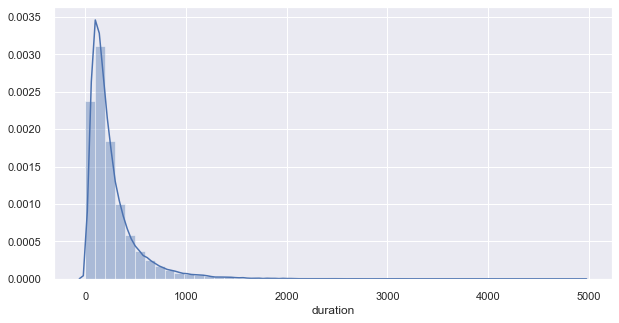

In [710]:
plt.figure(figsize=(10,5));
sns.distplot(df['duration']);

### Column 'duration' is highly positive skewed, let's try to transform it and minimize this skewness

In [711]:
df['duration'].describe()

count   45,211.00
mean       258.16
std        257.53
min          0.00
25%        103.00
50%        180.00
75%        319.00
max      4,918.00
Name: duration, dtype: float64

In [712]:
from sklearn.preprocessing import FunctionTransformer   

log_transformer = FunctionTransformer(np.log1p)

log_transformer

FunctionTransformer(accept_sparse=False, check_inverse=True,
                    func=<ufunc 'log1p'>, inv_kw_args=None, inverse_func=None,
                    kw_args=None, pass_y='deprecated', validate=None)

In [713]:
df['duration_transformed'] = log_transformer.fit_transform(df[['duration']])   # Log Transform the attribute 

C:\Users\mwx827397\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\Users\mwx827397\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [714]:
df['duration_transformed'].describe()

count   45,211.00
mean         5.17
std          0.92
min          0.00
25%          4.64
50%          5.20
75%          5.77
max          8.50
Name: duration_transformed, dtype: float64

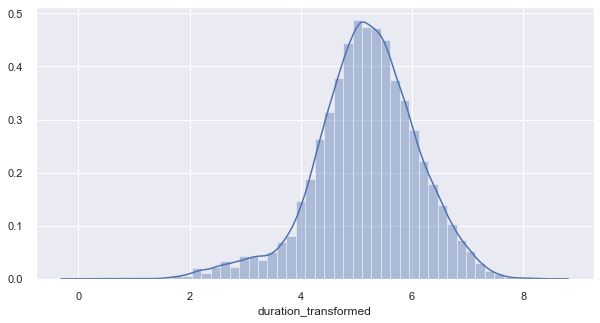

In [715]:
plt.figure(figsize=(10,5));
sns.distplot(df['duration_transformed']);

### Column 'duration' is now transformed to nearly normal distribution where 75th percentile is closer to 100th percentile and skewness is quite minimized

In [716]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target', 'balance_transformed',
       'balance_transformed_minmax', 'duration_transformed'],
      dtype='object')

In [717]:
df['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

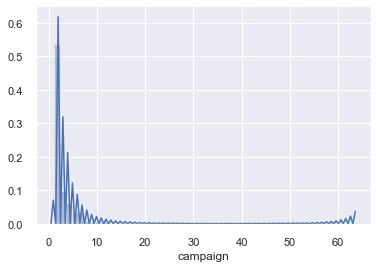

In [718]:
sns.distplot(df['campaign']);

In [719]:
df['campaign'].describe()

count   45,211.00
mean         2.76
std          3.10
min          1.00
25%          1.00
50%          2.00
75%          3.00
max         63.00
Name: campaign, dtype: float64

In [720]:
df['campaign_transformed'] = std_scale.fit_transform(df[['campaign']]) ## z-transformation

In [721]:
df['campaign_transformed'].describe()

count   45,211.00
mean         0.00
std          1.00
min         -0.57
25%         -0.57
50%         -0.25
75%          0.08
max         19.44
Name: campaign_transformed, dtype: float64

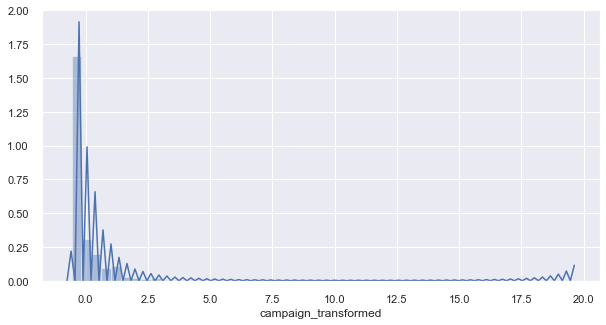

In [722]:
plt.figure(figsize=(10,5));
sns.distplot(df['campaign_transformed']);

In [723]:
df['campaign_transformed_1'] = log_transformer.fit_transform(df[['campaign']])

C:\Users\mwx827397\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\Users\mwx827397\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [724]:
df['campaign_transformed_1'].describe()

count   45,211.00
mean         1.16
std          0.51
min          0.69
25%          0.69
50%          1.10
75%          1.39
max          4.16
Name: campaign_transformed_1, dtype: float64

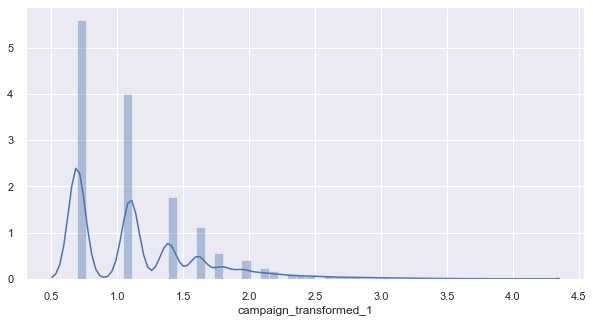

In [725]:
plt.figure(figsize=(10,5));
sns.distplot(df['campaign_transformed_1']);

### We found that 'campaign' is also positive skewed, but z-transform is not making it less skewed and log-transform is transforming it to multi-nomial and 75th percentile is closer to 100th percentile. so we might use it's log-transformed form

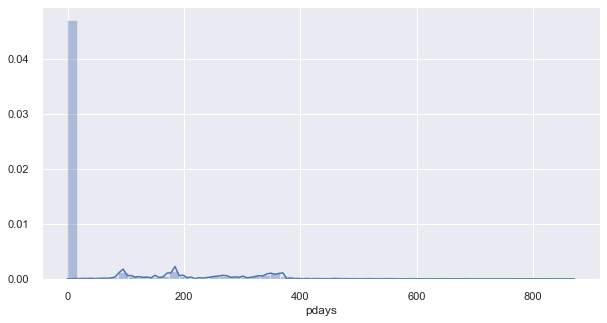

In [726]:
plt.figure(figsize=(10,5));
sns.distplot(df['pdays']);

In [727]:
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
 181      117
 370       99
 184       85
 364       77
 95        74
 350       73
 94        72
 175       71
 185       68
 93        65
 343       65
 188       64
 189       60
 186       60
 174       57
 96        57
 349       57
 363       55
 97        54
 90        54
 196       51
 365       51
 368       49
 342       49
 98        49
        ...  
 774        1
 550        1
 396        1
 492        1
 466        1
 45         1
 434        1
 18         1
 529        1
 465        1
 401        1
 784        1
 656        1
 592        1
 528        1
 464        1
 432        1
 655        1
 495        1
 543        1
 47         1
 782        1
 686        1
 558        1
 526        1
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [728]:
df[df['pdays'] == 0]

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,Target,balance_transformed,balance_transformed_minmax,duration_transformed,campaign_transformed,campaign_transformed_1


In [729]:
df['pdays'].describe()

count   45,211.00
mean        40.20
std        100.13
min         -1.00
25%         -1.00
50%         -1.00
75%         -1.00
max        871.00
Name: pdays, dtype: float64

In [730]:
df['pdays'] = df['pdays'].replace(-1,901)

In [731]:
df['pdays'].value_counts()

901    36954
182      167
92       147
91       126
183      126
181      117
370       99
184       85
364       77
95        74
350       73
94        72
175       71
185       68
343       65
93        65
188       64
186       60
189       60
174       57
96        57
349       57
363       55
97        54
90        54
196       51
365       51
342       49
98        49
357       49
       ...  
774        1
550        1
396        1
492        1
466        1
45         1
434        1
18         1
529        1
465        1
401        1
784        1
656        1
592        1
528        1
464        1
432        1
655        1
495        1
543        1
47         1
782        1
686        1
558        1
526        1
749        1
717        1
589        1
493        1
32         1
Name: pdays, Length: 559, dtype: int64

In [732]:
df['pdays_transformed'] = log_transformer.fit_transform(df[['pdays']])

C:\Users\mwx827397\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\Users\mwx827397\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [733]:
df['pdays_transformed'].describe()

count   45,211.00
mean         6.52
std          0.68
min          0.69
25%          6.80
50%          6.80
75%          6.80
max          6.80
Name: pdays_transformed, dtype: float64

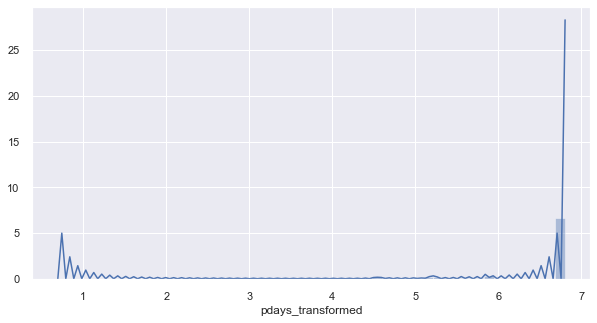

In [734]:
plt.figure(figsize=(10,5));
sns.distplot(df['pdays_transformed']);

### Here we imputed pdays = -1 with 901 as an indication that contact peried is beyond 900 days and it is also transforming our attribute to all positive values. We then log-transformed it now our 75th percentile is almost same as 100th percentile.
### We might use this transformed 'pdays-transformed' in our analysis

In [735]:
df['previous'].describe()

count   45,211.00
mean         0.58
std          2.30
min          0.00
25%          0.00
50%          0.00
75%          0.00
max        275.00
Name: previous, dtype: float64

In [736]:
df['previous'].value_counts().sort_values()

275        1
55         1
40         1
35         1
32         1
51         1
41         1
58         1
38         2
37         2
28         2
26         2
30         3
21         4
25         4
29         4
27         5
24         5
22         6
18         6
20         8
23         8
19        11
16        13
17        15
14        19
15        20
13        38
12        44
11        65
10        67
9         92
8        129
7        205
6        277
5        459
4        714
3       1142
2       2106
1       2772
0      36954
Name: previous, dtype: int64

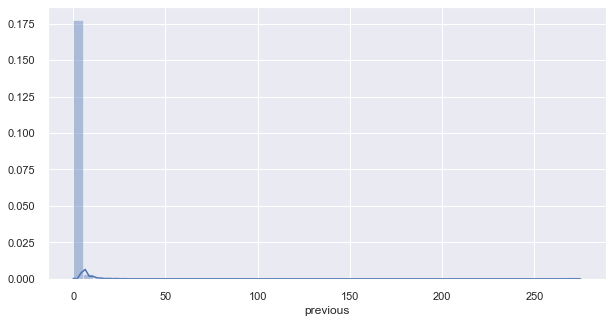

In [737]:
plt.figure(figsize=(10,5));
sns.distplot(df['previous']);

#### only 1 value which is 275 is making it highly positive skewed. let's impute it to nearest next maximum value which is 58

In [738]:
df['previous'] = df['previous'].replace(275,58)

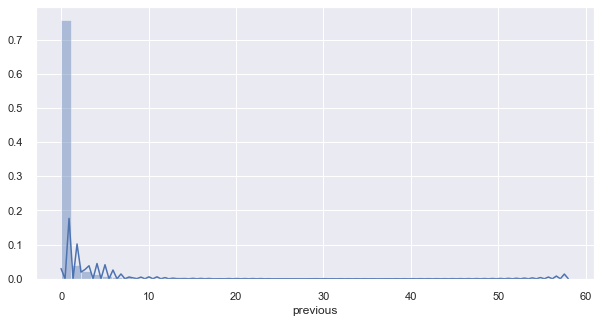

In [739]:
plt.figure(figsize=(10,5));
sns.distplot(df['previous']);

In [740]:
df['previous'].describe()

count   45,211.00
mean         0.58
std          1.93
min          0.00
25%          0.00
50%          0.00
75%          0.00
max         58.00
Name: previous, dtype: float64

In [741]:
df['previous_transformed'] = log_transformer.fit_transform(df[['previous']])

C:\Users\mwx827397\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\Users\mwx827397\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [742]:
df['previous_transformed'].describe()

count   45,211.00
mean         0.23
std          0.53
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          4.08
Name: previous_transformed, dtype: float64

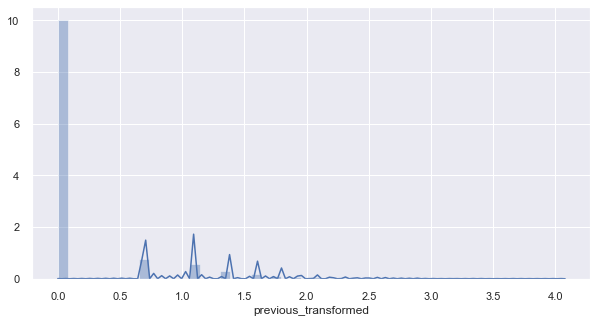

In [743]:
plt.figure(figsize=(10,5));
sns.distplot(df['previous_transformed']);

#### We can use this log-transformed pdays as 75th percentile is closer to 100th percentile after log-transforming

In [744]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [745]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

#### All values have some significant count, so we will not impute this attribute

In [746]:
df['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [747]:
print("Client who actually subscribed a term deposit are",round((df['Target'].value_counts()[1]/df['Target'].value_counts().sum())*100,2),"%")

Client who actually subscribed a term deposit are 11.7 %


## Multivariate Analysis

In [748]:
pd.crosstab(df['Target'], df['marital'],normalize='all')

marital,divorced,married,single
Target,,,
no,0.10,0.54,0.24
yes,0.01,0.06,0.04


#### Married people are slightly more likely to subscribe a term deposit than single and divorced people

In [749]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target', 'balance_transformed',
       'balance_transformed_minmax', 'duration_transformed',
       'campaign_transformed', 'campaign_transformed_1', 'pdays_transformed',
       'previous_transformed'],
      dtype='object')

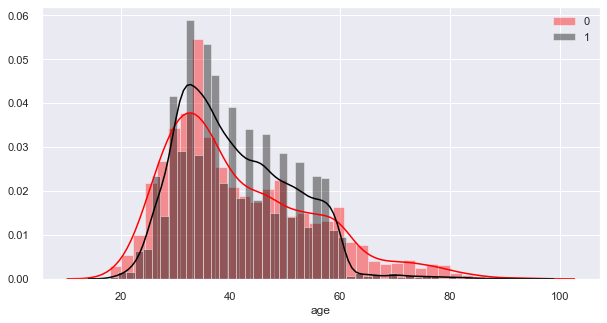

In [750]:
plt.figure(figsize=(10,5));
sns.distplot(df[df['Target']=="yes"]['age'],color='red',label=0)
sns.distplot(df[df['Target']=="no"]['age'],color='black',label=1)
plt.legend()
plt.show()

#### we can see that clients with age more than 60 are also subscribing a term deposit.

In [751]:
pd.crosstab(df['Target'], df['education'],normalize='all')

education,primary,secondary,tertiary,unknown
Target,,,,
no,0.14,0.46,0.25,0.04
yes,0.01,0.05,0.04,0.01


#### People with Secondary and Tertiary education are more subscribing to term deposit

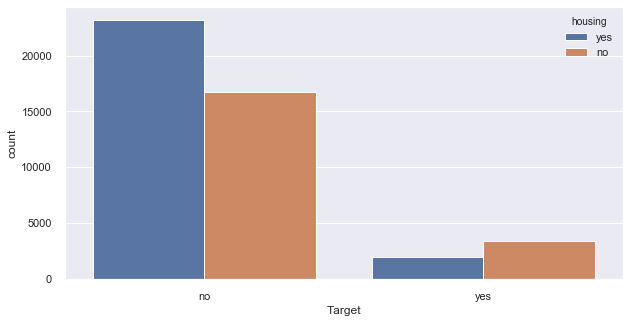

In [752]:
plt.figure(figsize=(10,5));
sns.countplot(df['Target'] , hue=df['housing']);

In [753]:
pd.crosstab(df['Target'], df['housing'],normalize='all')

housing,no,yes
Target,,
no,0.37,0.51
yes,0.07,0.04


#### Almost 4% of clients who have housing loan are subscribing to term deposit

In [754]:
pd.crosstab(df['Target'], df['default'],normalize='all')

default,no,yes
Target,,
no,0.87,0.02
yes,0.12,0.00


#### Almost 0% clients who are default are subscribing to term deposit, which is quite expected

In [755]:
pd.crosstab(df['Target'], df['loan'])

loan,no,yes
Target,,
no,33162,6760
yes,4805,484


#### Almost 7% of clients among personal loan criteria are subscribing to term deposit which is 1% of total clients

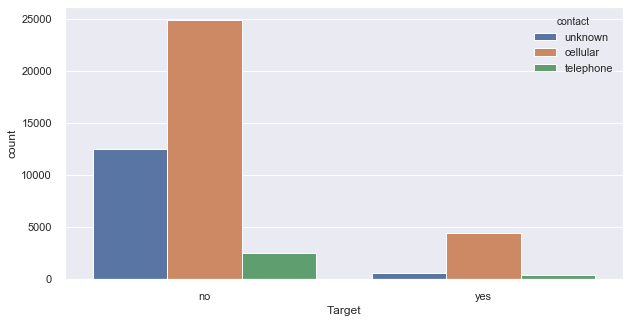

In [756]:
plt.figure(figsize=(10,5));
sns.countplot(df['Target'] , hue = df['contact']);

#### Cellular communication is most successful comunication type amongst the clients who subscribed to term deposit

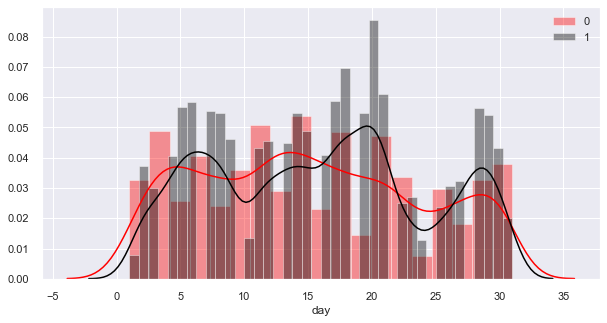

In [757]:
plt.figure(figsize=(10,5));
sns.distplot(df[df['Target']=="yes"]['day'],color='red',label=0)
sns.distplot(df[df['Target']=="no"]['day'],color='black',label=1)
plt.legend()
plt.show()

#### We can see that there are some days where we have no value of Target='No'. Chances of subscription becomes slightly more significant when days are less than 15

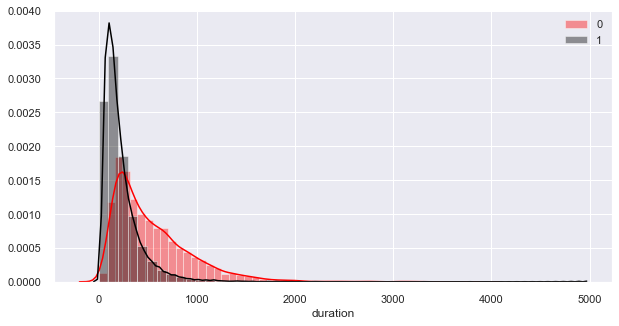

In [758]:
plt.figure(figsize=(10,5));
sns.distplot(df[df['Target']=="yes"]['duration'],color='red',label=0)
sns.distplot(df[df['Target']=="no"]['duration'],color='black',label=1)
plt.legend()
plt.show()

#### We can see that when last contact duration is less than 1000 seconds, clients are more likely to subscribe a term deposit

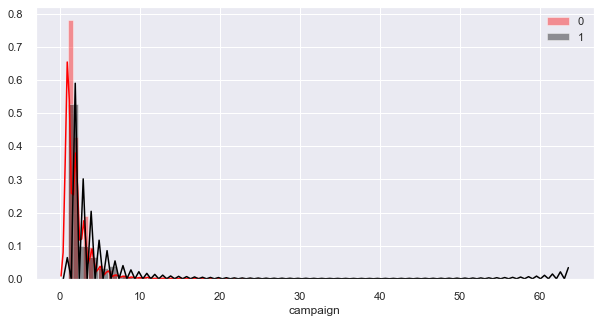

In [759]:
plt.figure(figsize=(10,5));
sns.distplot(df[df['Target']=="yes"]['campaign'],color='red',label=0)
sns.distplot(df[df['Target']=="no"]['campaign'],color='black',label=1)
plt.legend()
plt.show()

#### There is not much relation during subscription and campaign, because when peak of subscription is observed we actually have no campaign at that time

In [760]:
df.dtypes

age                             int64
job                            object
marital                        object
education                      object
default                        object
balance                         int64
housing                        object
loan                           object
contact                        object
day                             int64
month                          object
duration                        int64
campaign                        int64
pdays                           int64
previous                        int64
poutcome                       object
Target                         object
balance_transformed           float64
balance_transformed_minmax    float64
duration_transformed          float64
campaign_transformed          float64
campaign_transformed_1        float64
pdays_transformed             float64
previous_transformed          float64
dtype: object

In [761]:
for i in list(df.columns[df.dtypes=='object']):   # checking value counts of all object type columns
    print(df[i].value_counts())
    print()

blue-collar      9732
management       9458
technician       7597
admin            5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
other             288
Name: job, dtype: int64

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

no     44396
yes      815
Name: default, dtype: int64

yes    25130
no     20081
Name: housing, dtype: int64

no     37967
yes     7244
Name: loan, dtype: int64

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype:

In [762]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target', 'balance_transformed',
       'balance_transformed_minmax', 'duration_transformed',
       'campaign_transformed', 'campaign_transformed_1', 'pdays_transformed',
       'previous_transformed'],
      dtype='object')

In [763]:
df['Target'] = df['Target'].replace({"no":0,"yes":1}) # assigning 0 to "no" and 1 to "yes" values of Target Column to keep 
# our desired output intact

In [764]:
df['Target'].value_counts()

0    39922
1     5289
Name: Target, dtype: int64

In [765]:
columns_to_drop = ['balance_transformed', 'balance', 'duration', 'campaign',
                  'campaign_transformed', 'pdays', 'previous']
df_dropped = df.drop(columns_to_drop, axis = 1)
df_dropped.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'day', 'month', 'poutcome', 'Target',
       'balance_transformed_minmax', 'duration_transformed',
       'campaign_transformed_1', 'pdays_transformed', 'previous_transformed'],
      dtype='object')

In [766]:
df_ready = pd.get_dummies(df_dropped, drop_first=True)

In [767]:
df_ready.head()

,age,day,Target,balance_transformed_minmax,duration_transformed,campaign_transformed_1,pdays_transformed,previous_transformed,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,5,0,0.09,5.57,0.69,6.80,0.00,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,5,0,0.07,5.02,0.69,6.80,0.00,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,5,0,0.07,4.34,0.69,6.80,0.00,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,5,0,0.09,4.53,0.69,6.80,0.00,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,5,0,0.07,5.29,0.69,6.80,0.00,0,0,...,0,0,0,1,0,0,0,0,0,1


#### We have already standardized and normalized skewed variables and appropriate transformed variables are used in final data set which is to be used for data modeling

In [768]:
# Separate the independent attributes i.e. every column except 'Target' 
# Store the 'Target' column into Y array

X = df_ready.loc[:, df_ready.columns != 'Target']  # independent variables

Y = df_ready.loc[:, df_ready.columns == 'Target']  # Target (desired) variable

In [769]:
X.head()

,age,day,balance_transformed_minmax,duration_transformed,campaign_transformed_1,pdays_transformed,previous_transformed,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,5,0.09,5.57,0.69,6.80,0.00,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,5,0.07,5.02,0.69,6.80,0.00,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,5,0.07,4.34,0.69,6.80,0.00,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,5,0.09,4.53,0.69,6.80,0.00,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,33,5,0.07,5.29,0.69,6.80,0.00,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [770]:
Y.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [771]:
# Creating the training and test data set in the ratio of 70:30 respectively.

from sklearn.model_selection import train_test_split

features = [col for col in df_ready.columns if col != 'Target']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(df_ready[features], df_ready['Target'], test_size=.3, random_state=7)
Xtrain.shape, Xtest.shape

((31647, 42), (13564, 42))

In [772]:
Xtrain.head()

,age,day,balance_transformed_minmax,duration_transformed,campaign_transformed_1,pdays_transformed,previous_transformed,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
35272,39,7,0.11,3.71,0.69,6.80,0.00,0,0,0,...,0,0,0,1,0,0,0,0,0,1
10705,44,16,0.08,5.42,1.10,6.80,0.00,0,0,0,...,0,1,0,0,0,0,0,0,0,1
43536,46,26,0.08,6.14,1.10,5.91,1.10,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6960,55,28,0.07,5.15,0.69,6.80,0.00,1,0,0,...,0,0,0,1,0,0,0,0,0,1
41892,28,19,0.07,4.82,1.10,6.80,0.00,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [773]:
Xtest.head()

,age,day,balance_transformed_minmax,duration_transformed,campaign_transformed_1,pdays_transformed,previous_transformed,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
33177,36,20,0.08,5.90,0.69,6.80,0.00,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1544,33,8,0.07,4.33,1.61,6.80,0.00,0,0,0,...,0,0,0,1,0,0,0,0,0,1
44480,79,9,0.08,6.09,1.79,5.21,1.39,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17886,26,30,0.07,5.72,1.39,6.80,0.00,0,0,0,...,1,0,0,0,0,0,0,0,0,1
12505,30,2,0.07,4.56,1.39,6.80,0.00,0,0,0,...,1,0,0,0,0,0,0,0,0,1


#### Logistic Regression Model

In [774]:
from sklearn.linear_model import LogisticRegression   # importing logistic regression from scikit learn
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score

In [775]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

C:\Users\mwx827397\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Trainig accuracy 0.9026448004550194

Testing accuracy 0.9048215865526393
Confusion Matrix


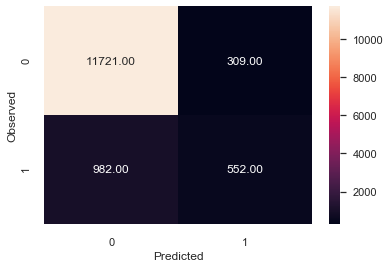

None

Recall: 0.35984354628422427

Precision: 0.6411149825783972

F1 Score: 0.46096033402922754

Roc Auc Score: 0.6670788803740323


In [776]:
model = LogisticRegression(random_state=7)

model.fit(Xtrain, Ytrain)

Y_predict = model.predict(Xtest)     

print("Trainig accuracy",model.score(Xtrain,Ytrain))
print()
print("Testing accuracy",model.score(Xtest, Ytest)) 
print('Confusion Matrix')
print(draw_cm(Ytest,Y_predict))
print()
print("Recall:",recall_score(Ytest,Y_predict))
print()
print("Precision:",precision_score(Ytest,Y_predict))
print()
print("F1 Score:",f1_score(Ytest,Y_predict))
print()
print("Roc Auc Score:",roc_auc_score(Ytest,Y_predict))

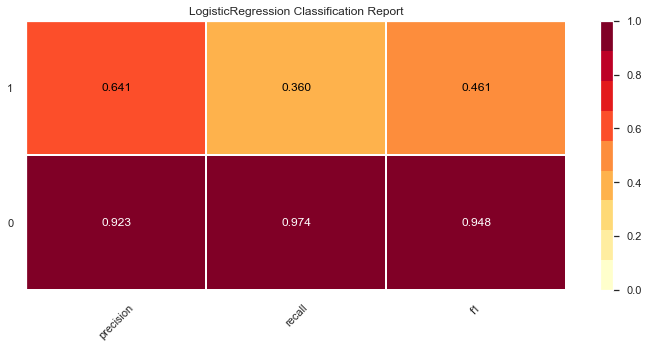

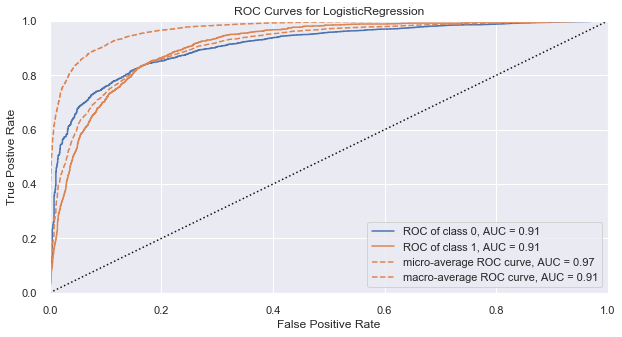

In [777]:
plt.figure(figsize=(10,5));
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(Xtrain, Ytrain)
viz.score(Xtest, Ytest)
viz.show()
plt.figure(figsize=(10,5));
roc = ROCAUC(model)
roc.fit(Xtrain, Ytrain)
roc.score(Xtest, Ytest)
roc.show();

In [778]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [779]:
train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=7,penalty='l2', solver=i)  # changing values of solver
    model.fit(Xtrain, Ytrain) 
    Y_predict = model.predict(Xtest)     
    train_score.append(round(model.score(Xtrain,Ytrain),3))
    test_score.append(round(model.score(Xtest, Ytest),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

C:\Users\mwx827397\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\mwx827397\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.902, 0.899, 0.903, 0.899, 0.897]

[0.905, 0.901, 0.905, 0.902, 0.9]


C:\Users\mwx827397\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Trainig accuracy 0.9024236104528075

Testing accuracy 0.9051902093777646
Confusion Matrix


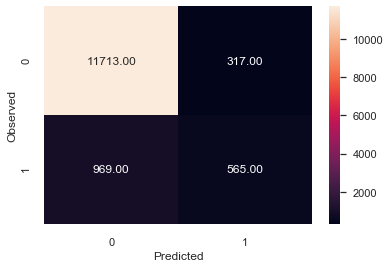

None

Recall: 0.3683181225554107

Precision: 0.6405895691609977

F1 Score: 0.4677152317880795

Roc Auc Score: 0.6709836664314875


In [780]:
model = LogisticRegression(random_state=7, penalty='l2', solver='newton-cg')

model.fit(Xtrain, Ytrain)

Y_predict = model.predict(Xtest)     

print("Trainig accuracy",model.score(Xtrain,Ytrain))
print()
print("Testing accuracy",model.score(Xtest, Ytest)) 
print('Confusion Matrix')
print(draw_cm(Ytest,Y_predict))
print()
print("Recall:",recall_score(Ytest,Y_predict))
print()
print("Precision:",precision_score(Ytest,Y_predict))
print()
print("F1 Score:",f1_score(Ytest,Y_predict))
print()
print("Roc Auc Score:",roc_auc_score(Ytest,Y_predict))

#### Let's try to further optimize it while checking different values of C, while keeping other parameters as same

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.897, 0.902, 0.902, 0.902, 0.902, 0.902]

[0.904, 0.906, 0.905, 0.905, 0.905, 0.905]

Confusion Matrix


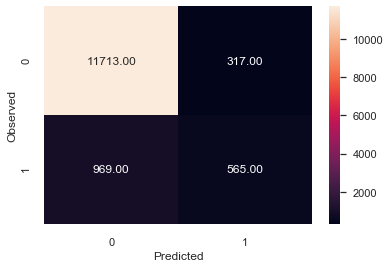

None

Recall: 0.3683181225554107

Precision: 0.6405895691609977

F1 Score: 0.4677152317880795

Roc Auc Score: 0.6709836664314875


In [781]:
train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=7, penalty='l2', solver='newton-cg', C=i)  # changing values of C
    model.fit(Xtrain, Ytrain) 
    Y_predict = model.predict(Xtest)     
    train_score.append(round(model.score(Xtrain,Ytrain),3)) # appending training accuracy in a blank list for every loop
    test_score.append(round(model.score(Xtest, Ytest),3))   # appending testing accuracy in a blank list for every loop
    
print(C)
print()
print(train_score)
print()
print(test_score)
print()
print('Confusion Matrix')
print(draw_cm(Ytest,Y_predict))
print()
print("Recall:",recall_score(Ytest,Y_predict))
print()
print("Precision:",precision_score(Ytest,Y_predict))
print()
print("F1 Score:",f1_score(Ytest,Y_predict))
print()
print("Roc Auc Score:",roc_auc_score(Ytest,Y_predict))

#### C=0.1 seems a better parameter, let's try

Trainig accuracy 0.9021392233071065

Testing accuracy 0.9057800058979653
Confusion Matrix


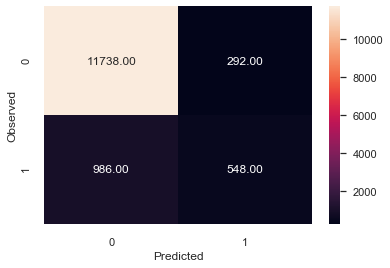

None

Recall: 0.35723598435462844

Precision: 0.6523809523809524

F1 Score: 0.46166807076663857

Roc Auc Score: 0.6664816663252777


In [782]:
model = LogisticRegression(random_state=7, penalty='l2', solver='newton-cg', C=0.1)

model.fit(Xtrain, Ytrain)

Y_predict = model.predict(Xtest)     

print("Trainig accuracy",model.score(Xtrain,Ytrain))
print()
print("Testing accuracy",model.score(Xtest, Ytest)) 
print('Confusion Matrix')
print(draw_cm(Ytest,Y_predict))
print()
print("Recall:",recall_score(Ytest,Y_predict))
print()
print("Precision:",precision_score(Ytest,Y_predict))
print()
print("F1 Score:",f1_score(Ytest,Y_predict))
print()
print("Roc Auc Score:",roc_auc_score(Ytest,Y_predict))

#### C=0.1 is not optimizing our desired performance metric i.e. Recall & F1 Score. Let's move back to default value of C=1 with class_weight=balanced

Trainig accuracy 0.8241223496697949

Testing accuracy 0.8249041580654675
Confusion Matrix


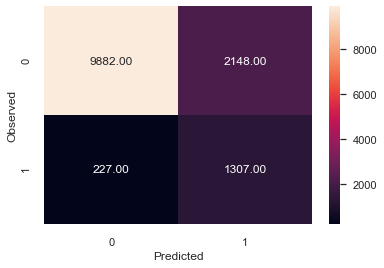

None

Recall: 0.8520208604954368

Precision: 0.3782923299565847

F1 Score: 0.5239526959310483

Roc Auc Score: 0.8367336222676685


In [783]:
model = LogisticRegression(random_state=7, penalty='l2', solver='newton-cg', class_weight='balanced')

model.fit(Xtrain, Ytrain)

Y_predict = model.predict(Xtest)     

print("Trainig accuracy",model.score(Xtrain,Ytrain))
print()
print("Testing accuracy",model.score(Xtest, Ytest)) 
print('Confusion Matrix')
print(draw_cm(Ytest,Y_predict))
print()
print("Recall:",recall_score(Ytest,Y_predict))
print()
print("Precision:",precision_score(Ytest,Y_predict))
print()
print("F1 Score:",f1_score(Ytest,Y_predict))
print()
print("Roc Auc Score:",roc_auc_score(Ytest,Y_predict))

#### 'class_weight=balanced' has tremendously improved Recall & F1 Score which is our desired performance metric
#### Recall is 85.20% & F1 Score is 52.39% which was 36.83% & 46.77% respectively

Trainig accuracy 0.821973646791165

Testing accuracy 0.8228398702447656
Confusion Matrix


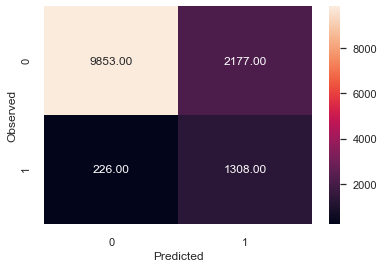

None

Recall: 0.8526727509778357

Precision: 0.3753228120516499

F1 Score: 0.5212193664076509

Roc Auc Score: 0.8358542474756177


In [795]:
model = LogisticRegression(random_state=7, penalty='l1', solver='liblinear', class_weight='balanced', C=0.1)

model.fit(Xtrain, Ytrain)

Y_predict = model.predict(Xtest)     

print("Trainig accuracy",model.score(Xtrain,Ytrain))
print()
print("Testing accuracy",model.score(Xtest, Ytest)) 
print('Confusion Matrix')
print(draw_cm(Ytest,Y_predict))
print()
print("Recall:",recall_score(Ytest,Y_predict))
print()
print("Precision:",precision_score(Ytest,Y_predict))
print()
print("F1 Score:",f1_score(Ytest,Y_predict))
print()
print("Roc Auc Score:",roc_auc_score(Ytest,Y_predict))

In [844]:
Acc_logit = accuracy_score(Ytest,Y_predict)
Recall_logit = recall_score(Ytest,Y_predict)
Recall_logit

0.8526727509778357

#### Optimizing a model with penalty=l1, class_weight=balanced, solver=liblinear & C=0.1 is even slightly better than previous one
#### It has improved Recall from 85.20% to 85.26%. Also it has decreaed 1 more False Positive i.e. from 227 to 226 now and has increased True Positive by 1

### So, this is our final Logistic Regression Model with Recall 85.26%

#### Decision Tree Model

In [797]:
model_entropy = DecisionTreeClassifier(criterion='entropy')

In [798]:
model_entropy.fit(Xtrain, Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [799]:
print("Train: %.2f" % model_entropy.score(Xtrain, Ytrain))  # performance on train data
print("Test: %.2f" % model_entropy.score(Xtest, Ytest))  # performance on test data

Train: 1.00
Test: 0.88


#### There is overfitting in this model as test accuracy is less than train accuracy.

#### Pruning the decision tree by limiting the max.depth of trees and doing it with class_weight=balanced as we note that it improves our desired performance metric i.e. Recall

In [800]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state=7, max_depth=4, class_weight='balanced')
clf_pruned.fit(Xtrain, Ytrain)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=7, splitter='best')

In [801]:
print("Train: %.2f" % clf_pruned.score(Xtrain, Ytrain))  # performance on train data
print("Test: %.2f" % clf_pruned.score(Xtest, Ytest))  # performance on test data

Train: 0.73
Test: 0.73


In [802]:
#!pip install pydotplus

In [803]:
#!pip install graphviz

In [804]:
features = [col for col in df_ready.columns if col != 'Target']

#### Decision Tree Performance

In [805]:
preds_train = clf_pruned.predict(Xtrain)
preds_test = clf_pruned.predict(Xtest)

acc_DT = accuracy_score(Ytest, preds_test)
recall_DT = recall_score(Ytest,preds_test)

In [806]:
# Confusion matrix
pd.crosstab(Ytest, preds_test, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,8562,3468
1,232,1302


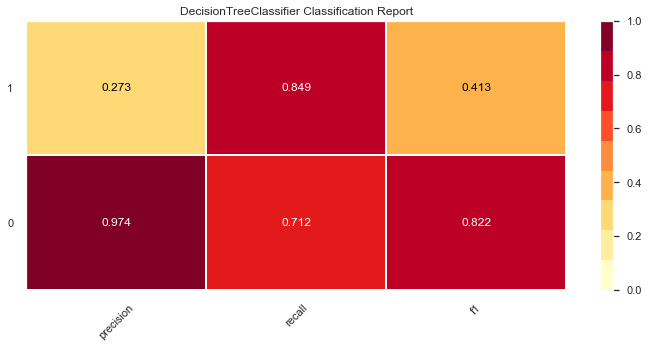

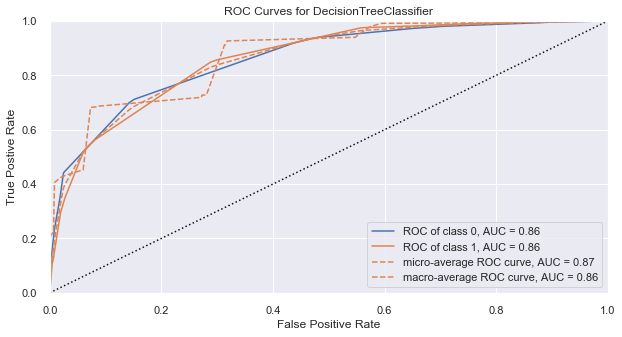

In [807]:
# Visualize model performance with yellowbrick library
plt.figure(figsize=(10,5));
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=4, class_weight='balanced', random_state=7))
viz.fit(Xtrain, Ytrain)
viz.score(Xtest, Ytest)
viz.show();
plt.figure(figsize=(10,5));
roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4, class_weight='balanced', random_state=7))
roc.fit(Xtrain, Ytrain)
roc.score(Xtest, Ytest)
roc.show();

In [808]:
## Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(features, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
duration_transformed,0.63
poutcome_success,0.19
contact_unknown,0.18
age,0.00
month_jan,0.00
housing_yes,0.00
loan_yes,0.00
contact_telephone,0.00
month_aug,0.00
month_dec,0.00


#### Decision Tree Accuracy

In [809]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'recall': recall_DT, 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'recall', 'accuracy']]
resultsDf

,Method,recall,accuracy
0,Decision Tree,0.85,0.73


#### Random Forest Model

In [810]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, class_weight='balanced', random_state=7)
rfcl = rfcl.fit(Xtrain, Ytrain)

In [811]:
pred_RF = rfcl.predict(Xtest)
acc_RF = accuracy_score(Ytest, pred_RF)
Recall_RF = recall_score(Ytest, pred_RF)

In [812]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'recall': Recall_RF, 'accuracy': acc_RF})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'recall', 'accuracy']]
resultsDf

,Method,recall,accuracy
0,Decision Tree,0.85,0.73
0,Random Forest,0.31,0.90


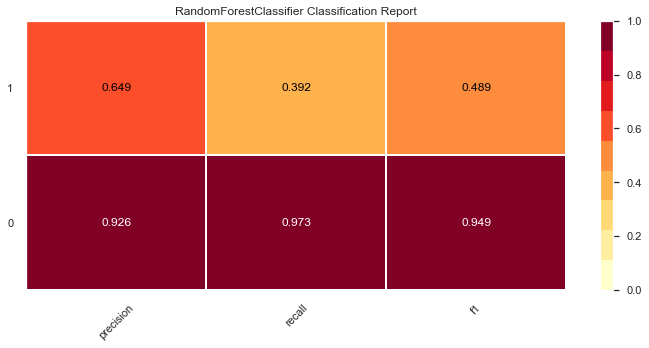

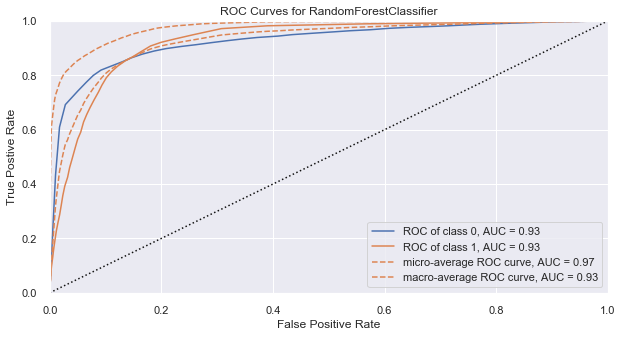

In [813]:
# Visualize model performance with yellowbrick library
plt.figure(figsize=(10,5));
viz = ClassificationReport(RandomForestClassifier(n_estimators = 50, random_state=7))
viz.fit(Xtrain, Ytrain)
viz.score(Xtest, Ytest)
viz.show();

plt.figure(figsize=(10,5));
roc = ROCAUC(RandomForestClassifier(n_estimators = 50, random_state=7))
roc.fit(Xtrain, Ytrain)
roc.score(Xtest, Ytest)
roc.show();

### Optimizing Random Forest

In [816]:
from sklearn.feature_selection import SelectFromModel

In [817]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 50, random_state=7))
sel.fit(Xtrain, Ytrain)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=50, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=7, verbose=0,
      

In [818]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False])

In [819]:
selected_feat= Xtrain.columns[(sel.get_support())]
len(selected_feat)

7

In [821]:
print(selected_feat)

Index(['age', 'day', 'balance_transformed_minmax', 'duration_transformed',
       'campaign_transformed_1', 'pdays_transformed', 'poutcome_success'],
      dtype='object')


#### SelectFromModel suggests 7 important features but our above calculation of feature importance i.e. "feat_imp" shows that only 3 features are significant. Let's consider those 3 features and try to optimize our RF Model

In [822]:
df_imp_features = df_ready[['duration_transformed','contact_unknown','poutcome_success']]

In [823]:
features_imp = [col for col in df_imp_features.columns]

In [824]:
features_imp

['duration_transformed', 'contact_unknown', 'poutcome_success']

In [825]:
Xtrain_feat, Xtest_feat, Ytrain_feat, Ytest_feat = train_test_split(df_imp_features[features_imp], 
                                                                    df_ready['Target'], test_size=.3, random_state=7)
Xtrain_feat.shape, Xtest_feat.shape

((31647, 3), (13564, 3))

In [826]:
rfcl_featured = RandomForestClassifier(n_estimators = 50, class_weight='balanced', random_state=7)
rfcl_featured = rfcl_featured.fit(Xtrain_feat, Ytrain_feat)

In [827]:
pred_RF_featured = rfcl_featured.predict(Xtest_feat)
acc_RF_featured = accuracy_score(Ytest_feat, pred_RF_featured)
Recall_RF_featured = recall_score(Ytest_feat, pred_RF_featured)
Recall_RF_featured

0.5853976531942634

In [828]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest Optimized'], 'recall': Recall_RF_featured, 'accuracy': acc_RF_featured})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'recall', 'accuracy']]
resultsDf

,Method,recall,accuracy
0,Decision Tree,0.85,0.73
0,Random Forest,0.31,0.90
0,Random Forest Optimized,0.59,0.80


#### So, we have optimized our Random Forest with important features. As, our desired performance metric Recall is optimized from 31% to 59% with building a RF Model using only Important Features

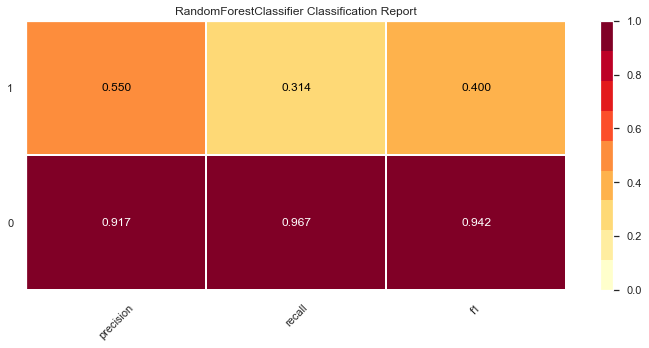

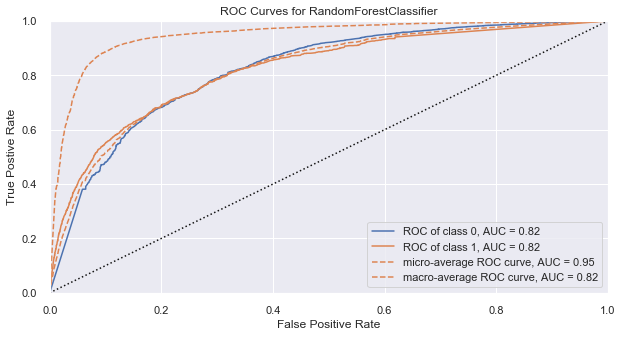

In [829]:
# Visualize model performance with yellowbrick library
plt.figure(figsize=(10,5));
viz_1 = ClassificationReport(RandomForestClassifier(n_estimators = 50, random_state=7))
viz_1.fit(Xtrain_feat, Ytrain_feat)
viz_1.score(Xtest_feat, Ytest_feat)
viz_1.show();

plt.figure(figsize=(10,5));
roc = ROCAUC(RandomForestClassifier(n_estimators = 50, random_state=7))
roc.fit(Xtrain_feat, Ytrain_feat)
roc.score(Xtest_feat, Ytest_feat)
roc.show();

### Adaboost Ensemble Algorithm

In [830]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=7)
abcl = abcl.fit(Xtrain, Ytrain)

In [831]:
pred_AB =abcl.predict(Xtest)
acc_AB = accuracy_score(Ytest, pred_AB)
Recall_AB = recall_score(Ytest, pred_AB)

In [832]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'recall': Recall_AB, 'accuracy': acc_AB})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'recall', 'accuracy']]
resultsDf

,Method,recall,accuracy
0,Decision Tree,0.85,0.73
0,Random Forest,0.31,0.90
0,Random Forest Optimized,0.59,0.80
0,Adaboost,0.22,0.90


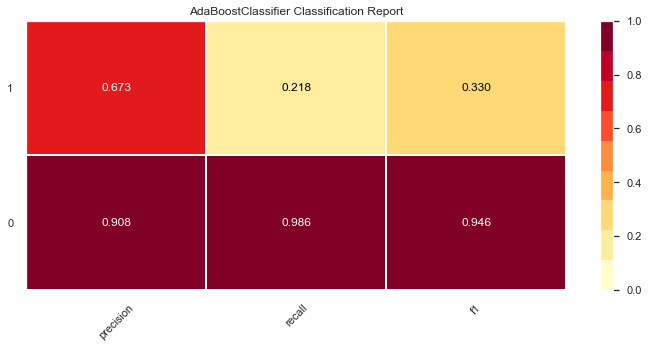

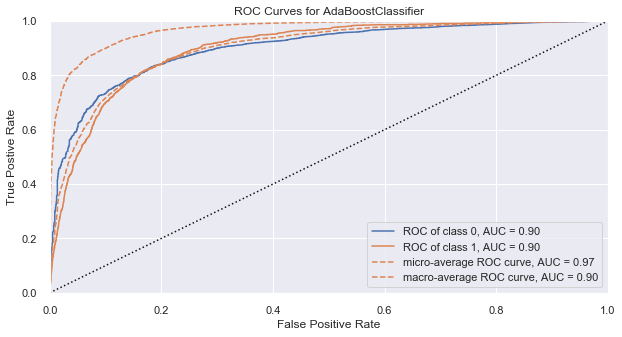

In [833]:
# Visualize model performance with yellowbrick library
plt.figure(figsize=(10,5));
viz = ClassificationReport(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=7))
viz.fit(Xtrain, Ytrain)
viz.score(Xtest, Ytest)
viz.show();

plt.figure(figsize=(10,5));
roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=7))
roc.fit(Xtrain, Ytrain)
roc.score(Xtest, Ytest)
roc.show();

### Bagging Classifier Algorithm

In [834]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=7)
bgcl = bgcl.fit(Xtrain, Ytrain)

In [835]:
bgcl.oob_score_

0.9015704490157045

In [836]:
pred_BG = bgcl.predict(Xtest)
acc_BG = accuracy_score(Ytest, pred_BG)
Recall_BG = recall_score(Ytest, pred_BG)

In [837]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'recall': Recall_BG, 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'recall', 'accuracy']]
resultsDf

,Method,recall,accuracy
0,Decision Tree,0.85,0.73
0,Random Forest,0.31,0.90
0,Random Forest Optimized,0.59,0.80
0,Adaboost,0.22,0.90
0,Bagging,0.44,0.90


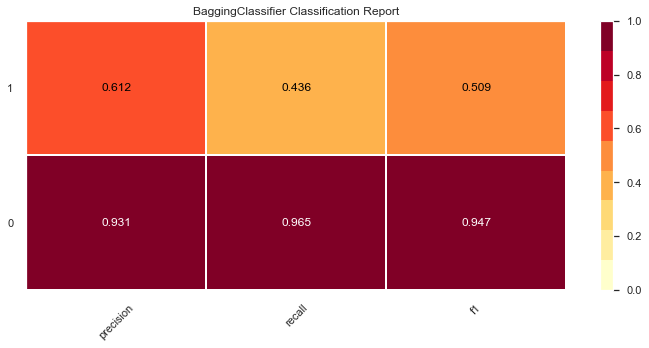

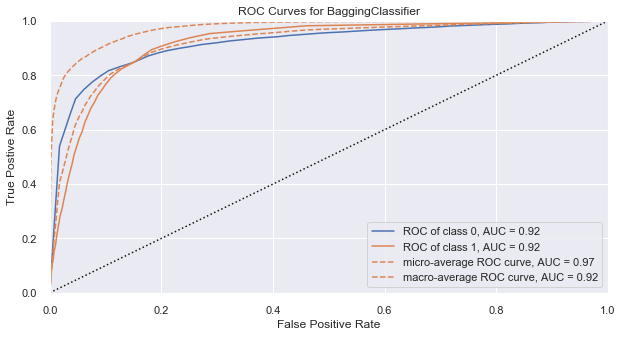

In [838]:
# Visualize model performance with yellowbrick library
plt.figure(figsize=(10,5));
viz = ClassificationReport(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=7))
viz.fit(Xtrain, Ytrain)
viz.score(Xtest, Ytest)
viz.show();


plt.figure(figsize=(10,5));
roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=7))
roc.fit(Xtrain, Ytrain)
roc.score(Xtest, Ytest)
roc.show();

### GradientBoost Classifier Algorithm

In [839]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=7)
gbcl = gbcl.fit(Xtrain, Ytrain)

In [840]:
pred_GB = gbcl.predict(Xtest)
acc_GB = accuracy_score(Ytest, pred_GB)
Recall_GB = recall_score(Ytest, pred_GB)

In [841]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'recall': Recall_GB, 'accuracy': acc_GB})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'recall', 'accuracy']]

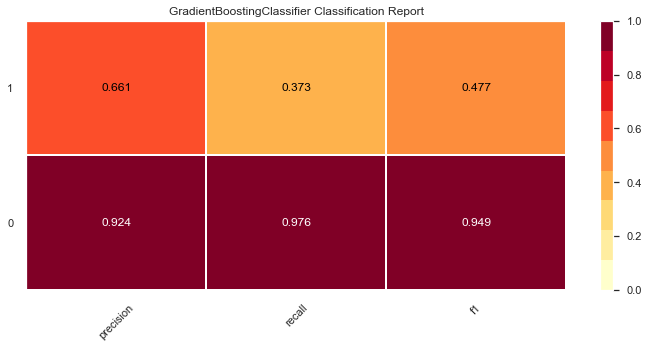

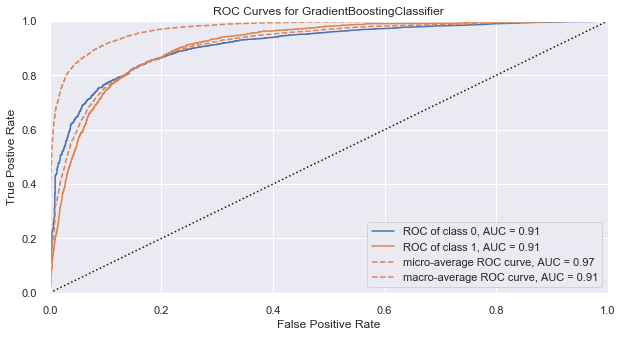

In [842]:
# Visualize model performance with yellowbrick library
plt.figure(figsize=(10,5));
viz = ClassificationReport(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=7))
viz.fit(Xtrain, Ytrain)
viz.score(Xtest, Ytest)
viz.show();

plt.figure(figsize=(10,5));
roc = ROCAUC(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=7))
roc.fit(Xtrain, Ytrain)
roc.score(Xtest, Ytest)
roc.show();

# Model Comparison

In [852]:
Comparison = pd.DataFrame({'Method':['Logit Regression','Decision Tree',
                                    'Random Forest','Random Forest Optimized','Adaboost','Bagging','Gradient Boost'], 
                           'recall': [Recall_logit,recall_DT,Recall_RF,Recall_RF_featured,Recall_AB,Recall_BG,Recall_GB], 
                           'accuracy': [Acc_logit,acc_DT,acc_RF,acc_RF_featured,acc_AB,acc_BG,acc_GB]})

In [853]:
Comparison

,Method,recall,accuracy
0,Logit Regression,0.85,0.82
1,Decision Tree,0.85,0.73
2,Random Forest,0.31,0.90
3,Random Forest Optimized,0.59,0.80
4,Adaboost,0.22,0.90
5,Bagging,0.44,0.90
6,Gradient Boost,0.37,0.91


## In a given data set, Logistic Regression is the best Model. Although Recall metric for Logistic Regression & Decision Tree is 85% but this is rounded off value.

## To be more precise, Recall Metric for Logistic Regression = 85.26% & Recall Metric for Decision Tree = 84.87%

## Logistic Regression is caring more for  False Positives than any other model, hence predicting a good model for Bank Marketing team to not to lose potential clients